In [126]:
# This cell is from the template notebook. It contains ipython magic and 
# various useful imports which are commonly used in this app.

%load_ext autoreload
%autoreload 2

import pandas as pd
import datetime
import numpy as np
import os
from acoustic_data_science import config, helpers
import matplotlib.pyplot as plt
import logging

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


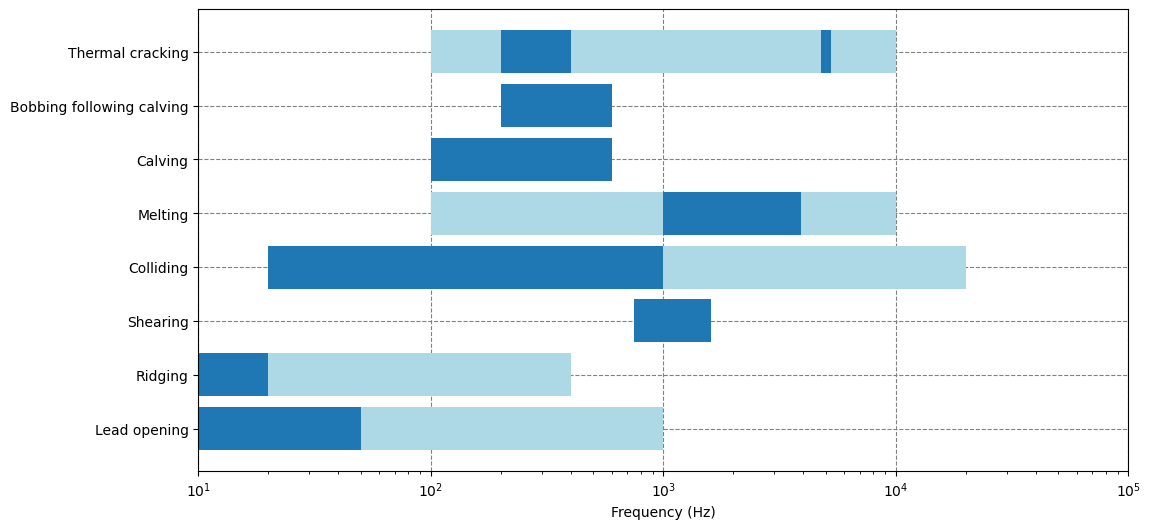

In [127]:
fig, ax = plt.subplots(figsize=(12,6))

labels = []
peak_lower_lims = []
peak_upper_lims = []
broad_lower_lims = []
broad_upper_lims = []

def append_freqs(label, peak_lower_lim, peak_upper_lim, broad_lower_lim, broad_upper_lim):
    
    if broad_lower_lim is None:
        broad_lower_lim = 0

    if broad_upper_lim is None:
        broad_upper_lim = 0
    
    labels.append(label)
    peak_lower_lims.append(peak_lower_lim)
    peak_upper_lims.append(peak_upper_lim)
    broad_lower_lims.append(broad_lower_lim)
    broad_upper_lims.append(broad_upper_lim)

append_freqs("Thermal cracking", 200, 300, 100, 10000)
append_freqs("Bobbing following calving", 200, 400, None, None)
append_freqs("Calving", 100, 500, None, None)
append_freqs("Melting", 1000, 3000, 100, 10000)
append_freqs("Colliding", 20, 1000, 20, 20000)
append_freqs("Shearing", 750, 850, None, None) # Single peak at 800 but made it +/- 50 Hz
append_freqs("Ridging", 10, 20, 10, 400)
append_freqs("Lead opening", 10, 50, 10, 1000)

peak_lower_lims = np.array(peak_lower_lims)
peak_upper_lims = np.array(peak_upper_lims)
broad_lower_lims = np.array(broad_lower_lims)
broad_upper_lims = np.array(broad_upper_lims)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.barh(labels, broad_upper_lims-broad_lower_lims, align='center', left=broad_lower_lims, color="lightblue")
ax.barh(labels, peak_upper_lims-broad_lower_lims, align='center', left=peak_lower_lims, color="tab:blue")
ax.barh("Thermal cracking", 500, align='center', left=5000-(500/2), color="tab:blue")
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Frequency (Hz)')
ax.set_xscale('log')
ax.set_xlim(10,100000)
plt.show()